In [1]:
from iquhack_scoring import MoveScorer
from bloqade import move
from matplotlib.animation import FuncAnimation, PillowWriter
from numpy import pi
from helper_functions import *
from answers import *

In [2]:
# any subrouting that you want to use in your solution

In [10]:
try:
    del main
except:
    pass
@move.vmove
def main():
    q = move.NewQubitRegister(3)

    state = move.Init(qubits=[q[0],q[1],q[2]], indices=[0,1,2])
    state.gate[[0,1,3]] = move.Move(state.storage[[0,1,2]])
    state = move.GlobalCZ(atom_state=state)
    state.gate[[2]] = move.Move(state.gate[[1]])
    # state = local_H(atom_state=state,indices=[target_indices])
    state = move.GlobalXY(atom_state=state,x_exponent=-pi/4,axis_phase_exponent=pi/2)
    state = move.LocalRz(atom_state=state,phi=pi,indices=[2])
    state = move.GlobalXY(atom_state=state,x_exponent=pi/4,axis_phase_exponent=pi/2)
    ###
    state = move.GlobalCZ(atom_state=state)
    ######
    state = move.GlobalXY(atom_state=state,x_exponent=-pi/4,axis_phase_exponent=pi/2)
    state = move.LocalRz(atom_state=state,phi=pi,indices=[2])
    state = move.GlobalXY(atom_state=state,x_exponent=pi/4,axis_phase_exponent=pi/2)
    # state = local_H(atom_state=state,indices=[target_indices])
    # state = local_CX(atom_state=state,target_indices=[2])
    move.Execute(state)

In [3]:
# try:
#     del main
# except:
#     pass
# @move.vmove()
# def main():
#     q = move.NewQubitRegister(3)

#     state = move.Init(qubits=[q[0],q[1],q[2]], indices=[0,1,2])
#     state.gate[[0,1,3]] = move.Move(state.storage[[0,1,2]])
#     state = move.GlobalCZ(atom_state=state)
#     state.gate[[2]] = move.Move(state.gate[[1]])
#     state = local_CX(atom_state=state,target_indices=[2])
    
#     move.Execute(state)

In [95]:
try:
    del main
except:
    pass
@move.vmove()
def main():
    q = move.NewQubitRegister(1)
    state = move.Init(qubits=[q[0]], indices=[0])
    state = move.GlobalXY(atom_state=state,x_exponent=pi,axis_phase_exponent=0.0)
    # state = move.GlobalRz(atom_state=state,phi=1/2)

    move.Execute(state)

In [96]:
from kirin.passes import aggressive
for passive in range(10):
    aggressive.Fold(move.vmove)(main)

In [97]:
# @move.vmove()
# def execute(state:move.core.AtomState):
#     move.Execute(state)

In [98]:
# The expected qasm code for the solution
expected_qasm = """
OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [q(0), q(1), q(2)]
qreg q[3];


cz q[0],q[1];
cx q[2],q[1];
"""

expected_qasm = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[1];
x q[0];
"""

In [99]:
scorer = MoveScorer(main, expected_qasm)
score = scorer.score()
print(score)
%whos

OPENQASM 2.0

;

include

"qelib1.inc"

;

gate 

xy

(

x

,

a

)

qarg

{

rz

(

a

)

qarg

;

rx

(

x

)

qarg

;

rz

(

-

a

)

qarg

;

}

qreg

q[1]

;

xy

(

3.141592653589793

,

0.0

)

q

[

0

]

;

// Global XY

output:


expected:

OPENQASM 2.0;
include "qelib1.inc";

qreg q[1];
x q[0];



ValueError: Output does not match expected QASM

In [73]:
%whos

Variable        Type             Data/Info
------------------------------------------
FuncAnimation   type             <class 'matplotlib.animation.FuncAnimation'>
MoveScorer      type             <class 'iquhack_scoring.score.MoveScorer'>
PillowWriter    ABCMeta          <class 'matplotlib.animation.PillowWriter'>
animation       FuncAnimation    <matplotlib.animation.Fun<...>object at 0x7f6c2e03d0d0>
expected_qasm   str              \nOPENQASM 2.0;\ninclude <...>\n\nqreg q[1];\nx q[0];\n
main            Method           Method("main")
move            module           <module 'bloqade.move' fr<...>loqade/move/__init__.py'>
pi              float            3.141592653589793
scorer          MoveScorer       MoveScorer(mt=Method("mai<...>\nqreg q[1];\nx q[0];\n')


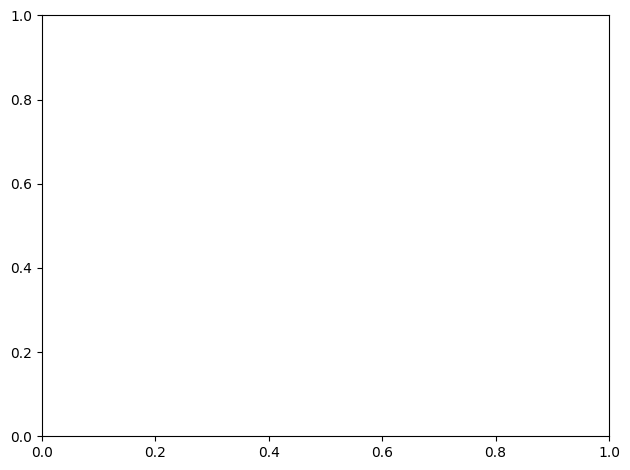

In [9]:
animation = scorer.animate()
animation.save("animation.gif", writer=PillowWriter(fps=1))